In [60]:
# Black-Scholes-Merton option pricing model implementation in Python

import math
import numpy as np

S0 = 100  # Current stock price
K = 100   # Strike price
T = 0.25   # Time to maturity in years
r = 0.021  # Risk-free interest rate
sigma = 0.2  # Volatility of the underlying asset

I = 10000  # Number of simulations

# Monte Carlo simulation
# np.random.seed(1000)  # For reproducibility
Z = np.random.standard_normal(I)  # Generate random normal variables
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * math.sqrt(T) * Z)  # Simulated end-of-period stock prices
payoffs = np.maximum(ST - K, 0)  # Calculate payoffs for call option

# Monte Carlo estimator
C0 = math.exp(-r * T) * np.mean(payoffs)  # Discounted present value of expected payoffs   
print(f"Estimated European Call Option Price: {C0:.2f}")
print(f"Estimated future price: {ST.mean():.2f}")


Estimated European Call Option Price: 4.22
Estimated future price: 100.47


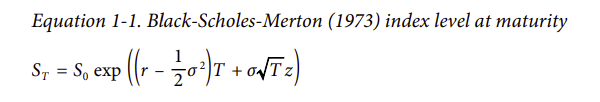
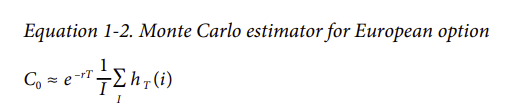

C:\Users\Jonas Pielmeier\AppData\Local\Temp\ipykernel_29356\3720217337.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

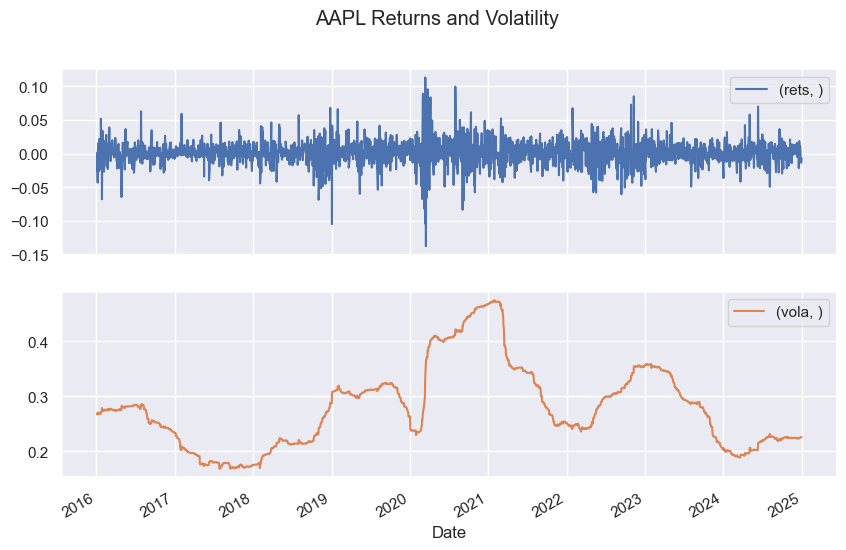

In [68]:
# Example of volatility analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import yfinance as yf

ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2025-01-01")
# print(data.head()) # check data

sns.set(style='darkgrid')
# mpl.rcParams['font.family'] = 'serif'

data['rets'] = np.log(data['Close'] / data['Close'].shift(1)) # log returns
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252) # Annualized volatility
data[["rets","vola"]].dropna().plot(subplots=True, figsize=(10,6), title=f"{ticker} Returns and Volatility")